## Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Filtering Warning Messages

In [24]:
warnings.filterwarnings('ignore')

## FFT Function

In [25]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x

    even = fft(x[0::2])
    odd = fft(x[1::2])

    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

## IFFT Function

In [26]:
def ifft(x):
    N = len(x)
    if N <= 1:
        return x

    even = ifft(x[0::2])
    odd = ifft(x[1::2])

    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]

    return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]  

## 4 Point Signal

In [27]:
x = [1, 2, 3, 4]

## FFT of 4 Point Signal

In [28]:
X = fft(x)
X

[(10+0j), (-2+2j), (-2+0j), (-1.9999999999999998-2j)]

### IFFT of FFT of 4 Point Signal

In [29]:
x_iff = ifft(X)
np.abs(x_iff)

array([1., 2., 3., 4.])

## Plotting the Signala

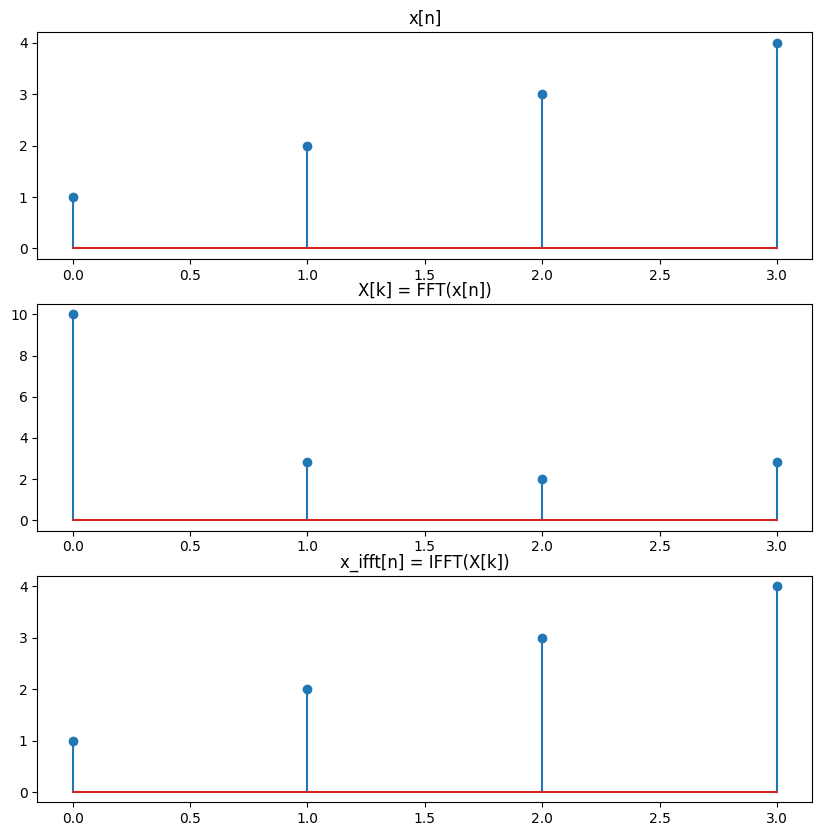

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.stem(np.abs(x),use_line_collection=True)
plt.title('x[n]')
plt.subplot(3,1,2)
plt.stem(np.abs(X),use_line_collection=True)
plt.title('X[k] = FFT(x[n])')
plt.subplot(3,1,3)
plt.stem(np.abs(x_iff),use_line_collection=True)
plt.title('x_ifft[n] = IFFT(X[k])')
plt.show()



## Calculating no of Additions and Multiplications

In [1]:
complex_additions = 0
complex_multiplications = 0

In [3]:
def fft_with_count(x):
    global  complex_additions,complex_multiplications
    
    N = len(x)
    if N <= 1:
        return x

    even = fft_with_count(x[0::2])
    odd = fft_with_count(x[1::2])

    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    
    for k in range(N // 2):
        complex_additions += 2  
        complex_multiplications += 1  

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

In [4]:
signal = [1, 2, 3, 4]

In [7]:
fft_result = fft_with_count(signal)

In [8]:
print("FFT Result:")
print(fft_result)

print("\nOperation Counts:")
print(f"Complex Additions: {complex_additions}")
print(f"Complex Multiplications: {complex_multiplications}")

FFT Result:
[(10+0j), (-2+2j), (-2+0j), (-1.9999999999999998-2j)]

Operation Counts:
Complex Additions: 8
Complex Multiplications: 4
